In [2]:
import pandas as pd
import numpy as np

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold

#classifiers
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, StackingClassifier

#Prformance metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

from sklearn.exceptions import ConvergenceWarning
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

simplefilter(action='ignore', category=ConvergenceWarning)

simplefilter(action='ignore', category=UserWarning)
from statistics import mean

#Explainable AI
import shap

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize']=15,10

In [ ]:
def Algo_search(models , params, X_train, y_train, X_test, y_test):

    max_score = 0
    max_model = None
    max_model_params = None
    estimators_gridsearch = pd.DataFrame()
    models_est = []
    parametres = []
    lscore = []
    lroc = []
    lfscore = []
    lprecision = []
    lrecall = []
    
    scoring = {'accuracy': make_scorer(accuracy_score), 
               'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
               'f1': make_scorer(f1_score), 
               'precision': make_scorer(precision_score), 
               'recall': make_scorer(recall_score),}

    for i,j in zip(models.keys() , models.values() ):

        gs = GridSearchCV(estimator=j,param_grid=params[i], scoring=scoring, refit = "accuracy", )
        a = gs.fit(X_train,y_train)
        score = gs.score(X_test,y_test )
        mauc = []
        mprecision = []
        mrecall = []
        mfscore = []
        maccuracy = []
        for i in range(5):
          maccuracy.append(mean(gs.cv_results_['split'+str(i)+'_test_accuracy']))
          mauc.append(mean(gs.cv_results_['split'+str(i)+'_test_roc_auc']))
          mfscore.append(mean(gs.cv_results_['split'+str(i)+'_test_f1']))
          mprecision.append(mean(gs.cv_results_['split'+str(i)+'_test_precision']))
          mrecall.append(mean(gs.cv_results_['split'+str(i)+'_test_recall']))
        models_est.append(gs.best_estimator_)
        parametres.append(gs.best_params_)
        lscore.append(round(score,2))
        lroc.append(round(mean(mauc),2))
        lfscore.append(round(mean(mfscore),2))
        lprecision.append(round(mean(mprecision),2))
        lrecall.append(round(mean(mrecall),2))

        if score > max_score:
            max_score = score
            max_model = gs.best_estimator_
            max_model_params = gs.best_params_

    estimators_gridsearch['Models'] = list(models_est)
    estimators_gridsearch['Best parameters'] = list(parametres)
    estimators_gridsearch['Score'] = list(lscore)
    estimators_gridsearch['AUC'] = list(lroc)
    estimators_gridsearch['F1-score'] = list(lfscore)
    estimators_gridsearch['Precision'] = list(lprecision)
    estimators_gridsearch['Recall'] = list(lrecall)
   

    # print(estimators_gridsearch)

    return [max_score, max_model, max_model_params], estimators_gridsearch

In [ ]:
#Data points

models = {'model_gbm':GradientBoostingClassifier(), 'model_rf':RandomForestClassifier(), 
  'model_dt':DecisionTreeClassifier(), 'model_svm':SVC(), 'model_ada':AdaBoostClassifier(), 'model_knn': KNeighborsClassifier(), 
  'model_xgb': xgb.XGBClassifier(),'model_ext': ExtraTreesClassifier(), 'model_mlp': MLPClassifier()}
params_gbm = {'learning_rate':[0.1,0.2,0.3,0.4], 'n_estimators':[50,100,500,1000,2000]}
params_rf = {'n_estimators':[50,100,500,1000,2000], 'max_depth' : [5, 10, 20], 'class_weight' : [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]}
params_dt = {'splitter':['best','random'], 'max_depth':[1, 5, 10, 50, 100]}
params_svm = {'C':[1,2,5,10,50,100,500], 'kernel':['rbf','poly','sigmoid','linear']}
params_ada = {'n_estimators':[10,20,30,50,100,500,1000], 'learning_rate':[0.5,1,2,5,10]}
params_knn = {'n_neighbors' : [2,5,10,25,50]}
params_xgb = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
params_ext = {'n_estimators':[50,100,500,1000,2000], 'max_depth' : [5, 10, 20], 'class_weight' : [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]}
model_mlp = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 
             'learning_rate':['constant','adaptive'], 'alpha': [0.0001, 0.05],
             'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)]}
params = {'model_gbm':params_gbm, 'model_rf':params_rf, 'model_dt':params_dt, 'model_svm':params_svm, 'model_ada':params_ada, 'model_knn': params_knn,
          'model_xgb':params_xgb, 'model_ext':params_ext, 'model_mlp': model_mlp}

In [5]:
mgh = pd.read_excel('mghML.xlsx')
icl = pd.read_excel('iclML.xlsx')
yps = pd.read_excel('ypsML.xlsx')

In [6]:
common_columns = list(set(mgh) & set(icl) & set(yps))
mgh_c = mgh[common_columns]
icl_c = icl[common_columns]
yps_c = yps[common_columns]

In [7]:
yps_c = yps_c.drop([124, 125, 126])
percent_missing = yps_c.isnull().sum() * 100 / len(yps_c)
missing_value_df = pd.DataFrame({'column_name': yps_c.columns,
                                 'percent_missing': percent_missing})
missing_value_df.loc[missing_value_df['percent_missing']> 0.000] 

,column_name,percent_missing
CD6,CD6,100.0


In [8]:
mgh_con = mgh_c.drop('CD6', axis=1)
icl_con = icl_c.drop('CD6', axis=1)
yps_con = yps_c.drop('CD6', axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler


col = mgh_con.drop(['WHO max', 'KIDNEY', 'Age cat'], axis=1).columns

sc = StandardScaler()

for i in col:
  
  mgh_con[[i]] = sc.fit_transform(mgh_con[[i]])
  
  icl_con[[i]] = sc.fit_transform(icl_con[[i]])
  
  yps_con[[i]] = sc.fit_transform(yps_con[[i]])

In [10]:
df = pd.concat([mgh_con, icl_con, yps_con],ignore_index=True)
df = df.sample(frac = 1)
df

,EIF5A,TSLP,REN,CLEC4A,CCL20,MMP12,DFFA,TANK,TNFSF14,KIDNEY,...,TRIM21,CD5,IL13,FGF2,PRSS8,NRTN,LEP,CX3CL1,FABP2,EIF4G1
205,0.427776,0.219359,-0.654492,0.886785,0.057289,-0.271026,-1.568256,-1.151494,-1.004937,0.0,...,-0.561231,1.323636,-0.256295,-0.696508,0.067139,1.230734,0.149710,-0.529519,-0.499718,-1.457445
554,1.199543,0.015980,-0.343059,1.295473,0.611233,-1.225389,0.270095,0.703410,-0.193354,0.0,...,0.291185,-1.325431,-0.067126,0.756294,-1.087561,0.807606,0.635897,-0.856001,-0.316960,0.633156
317,-0.020546,-0.682248,-1.230933,-0.453155,0.555163,-0.700046,-1.034567,-1.011600,-0.999193,1.0,...,-0.688020,0.436587,-1.029629,0.729925,0.770697,0.110069,-0.084394,1.627376,0.330189,-1.954419
134,0.903014,-0.724603,1.127840,-0.862362,-1.013522,-0.397022,-0.886407,-1.470751,-1.279264,0.0,...,-0.889442,-0.337342,-0.220813,-1.194730,0.066726,0.628364,-0.142021,-0.721539,-0.098460,-1.389157
393,-0.137856,-0.699117,1.970456,-1.120721,-0.516993,1.837339,-1.315627,-0.835735,-1.199568,0.0,...,-0.522717,-0.505969,-1.473595,0.291572,0.789110,-1.053000,0.051948,-0.980660,-0.427216,-0.385489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,5.404873,-1.021953,-1.221840,0.993806,-0.716679,0.489253,-0.910588,0.335604,-1.416965,0.0,...,-1.321838,0.970078,0.371033,-0.943411,0.177150,0.155083,1.534893,0.209144,0.557000,0.198854
434,-0.250850,0.093490,-0.485348,-0.360404,-0.879234,1.102256,0.861275,0.644696,-0.177693,0.0,...,0.445338,0.083295,-0.715796,1.223459,0.746863,-0.648675,-0.438542,-0.250609,0.431068,0.415403
7,1.210717,1.012899,0.708074,0.946584,-0.448095,0.608426,0.260045,-0.023153,-0.304856,1.0,...,-0.211343,-0.242537,0.763609,1.167535,0.565156,-0.050913,-0.308632,1.536655,-0.156789,0.229636
264,0.922245,-0.141157,-0.194499,0.067896,-0.589312,-0.015966,-0.908571,-0.934176,-0.321177,0.0,...,-1.150755,-0.719191,-0.810600,-0.967820,-1.334936,-1.759853,0.232620,0.965740,-0.468053,-1.596908


In [11]:
X = df.drop(['WHO max'], axis=1)
y = df['WHO max']

In [12]:
pca = PCA(.90)
 
X = pca.fit_transform(X[col])
X = pd.DataFrame(X)
X['KIDNEY'] = list(df['KIDNEY'])
X['Age cat'] = list(df['Age cat'])
 
explained_variance = pca.explained_variance_ratio_

In [13]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, index=yps_con.drop(['WHO max'], axis=1)[col].columns)
loading_matrix

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
EIF5A,0.002490,-0.075892,0.016191,0.098849,0.081403,0.019497,0.025518,-0.094239,0.036825,0.143207,...,0.009207,0.049383,0.000436,0.045613,-0.011380,0.030067,-0.055873,0.030531,-0.012346,-0.056430
TSLP,0.147091,0.037029,-0.036931,0.042037,-0.052266,-0.097078,0.027333,-0.080114,-0.098709,0.067811,...,-0.002154,0.127463,0.041106,0.036931,-0.023312,-0.014274,0.016070,-0.037726,0.008829,0.024695
REN,0.366526,0.295724,-0.089503,-0.102782,-0.150413,0.069110,-0.034609,0.098668,-0.148987,0.065200,...,0.122121,-0.085969,-0.058234,-0.018063,-0.040514,0.013289,-0.119094,0.073611,0.037288,-0.035763
CLEC4A,0.316929,-0.039303,0.516164,0.240055,0.073694,0.228439,0.127792,0.053025,-0.021496,-0.214823,...,-0.082880,-0.023650,0.118088,-0.012166,0.091083,-0.026898,-0.023628,0.010866,0.039110,-0.068966
CCL20,0.423381,0.431212,-0.299378,-0.142980,-0.106195,-0.010109,0.186075,0.073080,-0.258966,-0.036704,...,0.004822,0.122517,0.065848,0.050900,0.044000,-0.042717,0.099000,-0.069259,-0.113400,0.047035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NRTN,0.188012,-0.001526,-0.048571,-0.128337,-0.139261,-0.047942,0.148101,0.084699,-0.069329,0.295446,...,-0.087362,-0.015431,-0.050720,0.085625,-0.091288,-0.008174,-0.070086,0.017301,-0.162616,0.017255
LEP,0.166148,-0.008122,0.245906,-0.095866,-0.102171,-0.042069,-0.179555,-0.280144,0.112736,-0.097021,...,-0.003804,-0.005765,-0.002988,0.070961,-0.011515,0.024117,-0.010310,-0.025264,-0.033985,-0.024909
CX3CL1,0.530829,0.513543,0.070017,0.154169,-0.046195,-0.073966,-0.223767,0.090824,-0.083951,0.068976,...,-0.101582,-0.098862,0.003108,-0.020878,-0.048503,0.057581,-0.021676,0.009993,-0.047559,-0.003774
FABP2,0.288093,0.057658,0.470121,0.202338,-0.093848,0.043206,-0.136253,0.076404,0.013336,-0.013213,...,0.113759,0.029768,0.056744,0.163061,0.012709,-0.042067,0.019319,0.092736,0.018345,-0.035854


In [14]:
X, X_test, y, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
grid_mX_pca, grid_ml_pca = Algo_search(models = models, params = params, X_train=X, y_train=y, X_test=X_test, y_test=y_test)

grid_ml_pca

,Models,Best parameters,Score,AUC,F1-score,Precision,Recall
0,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.4, 'n_estimators': 500}",0.73,0.87,0.65,0.78,0.57
1,"(DecisionTreeClassifier(max_depth=20, max_feat...","{'class_weight': None, 'max_depth': 20, 'n_est...",0.73,0.86,0.41,0.88,0.28
2,"DecisionTreeClassifier(max_depth=5, splitter='...","{'max_depth': 5, 'splitter': 'random'}",0.68,0.62,0.32,0.50,0.26
3,SVC(C=5),"{'C': 5, 'kernel': 'rbf'}",0.85,0.91,0.70,0.77,0.66
4,"(DecisionTreeClassifier(max_depth=1, random_st...","{'learning_rate': 0.5, 'n_estimators': 500}",0.77,0.87,0.64,0.72,0.60
5,KNeighborsClassifier(),{'n_neighbors': 5},0.76,0.82,0.42,0.71,0.30
6,"(ExtraTreeClassifier(max_depth=10, random_stat...","{'class_weight': {0: 1, 1: 5}, 'max_depth': 10...",0.77,0.87,0.52,0.85,0.38
7,"MLPClassifier(alpha=0.05, solver='lbfgs')","{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.83,0.87,0.67,0.71,0.65
8,"XGBClassifier(learning_rate=0.3, max_depth=5, ...","{'gamma': 0, 'learning_rate': 0.3, 'max_depth'...",0.77,0.87,0.56,0.77,0.45


### Explainable AI

In [15]:
clf = SVC(C=5,
          kernel="rbf"
)

clf.fit(X, y)

explainer = shap.KernelExplainer(clf.predict,X)
shap_values = explainer.shap_values(X_test)

Using 492 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/124 [00:00<?, ?it/s]

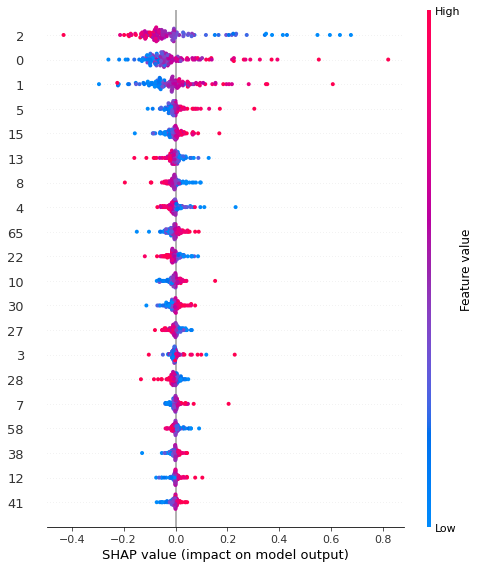

In [16]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values,X_test,feature_names=X.columns, max_display =20,show=False )
plt.savefig('mlp_xai_task3.svg')

In [17]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.to_excel('mgh_task3_xai.xlsx')

In [18]:
lp =  [i for i in list(feature_importance['col_name'])[:21] if str(i).isdigit()]

load_trans = loading_matrix[lp].T
magnitude = 0
loading_pow = {}
for i in load_trans.columns:
  magnitude = load_trans[i].pow(2).sum()
  loading_pow[i] = magnitude

pd.DataFrame.from_dict(loading_pow, orient='index').to_excel('loadingspowTask3SVM.xlsx')